<a href="https://colab.research.google.com/github/aquapathos/MLLesson/blob/master/SMB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gym-super-mario-bros > /dev/null
!pip install wandb > /dev/null
!pip install stable-baselines3 > /dev/null

このインストール過程で、[nes-py](https://github.com/Kautenja/nes-py) というファミコンエミュレータがインストールされる模様。

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import gym
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT,COMPLEX_MOVEMENT,RIGHT_ONLY

env_id = 'SuperMarioBros-v0'
env = gym_super_mario_bros.make(env_id )
print(env.action_space)
env = JoypadSpace(env, SIMPLE_MOVEMENT)
print(env.action_space)
env.unwrapped.get_action_meanings() 
env.get_keys_to_action()

Discrete(256)
Discrete(7)


{(): 0,
 (97,): 6,
 (100,): 1,
 (100, 111): 2,
 (100, 111, 112): 4,
 (100, 112): 3,
 (111,): 5}

スーパーマリオのアクションスペースは256種ものアクションがあり、[JoypadSpace() ](https://github.com/Kautenja/nes-py/blob/master/nes_py/wrappers/joypad_space.py))というラッパーを通すと7種に減ることがわかる。[JoypadSpace() ](https://github.com/Kautenja/nes-py/blob/master/nes_py/wrappers/joypad_space.py)のソースを見ると、

```
    # a mapping of buttons to binary values
    _button_map = {
        'right':  0b10000000,
        'left':   0b01000000,
        'down':   0b00100000,
        'up':     0b00010000,
        'start':  0b00001000,
        'select': 0b00000100,
        'B':      0b00000010,
        'A':      0b00000001,
        'NOOP':   0b00000000,
    }```
とあり、

```
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT```

は、[actions.py](https://github.com/Kautenja/gym-super-mario-bros/blob/1a3dde897700614f729fc3294c1e451528d9a112/gym_super_mario_bros/actions.py)で、

```
# actions for very simple movement
SIMPLE_MOVEMENT = [
    ['NOOP'],
    ['right'],
    ['right', 'A'],
    ['right', 'B'],
    ['right', 'A', 'B'],
    ['A'],
    ['left'],
]
```
と定義されている。

In [9]:
env.reset().shape

(240, 256, 3)

In [10]:
dir(env.unwrapped)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_area',
 '_backup',
 '_coins',
 '_controller_buffer',
 '_death_penalty',
 '_did_reset',
 '_did_step',
 '_env',
 '_flag_get',
 '_frame_advance',
 '_get_done',
 '_get_info',
 '_get_reward',
 '_has_backup',
 '_is_busy',
 '_is_dead',
 '_is_dying',
 '_is_game_over',
 '_is_stage_over',
 '_is_world_over',
 '_kill_mario',
 '_left_x_position',
 '_level',
 '_life',
 '_player_state',
 '_player_status',
 '_ram_buffer',
 '_read_mem_range',
 '_restore',
 '_rom_path',
 '_runout_prelevel_timer',
 '_score',
 '_screen_buffer',
 '_skip_change_area',
 '_skip_end_of_world',
 '_skip_occupied_states',
 '_skip_start_s

In [11]:
a,b,c,d = env.step(1)
a.shape,b,c,d

((240, 256, 3),
 0,
 False,
 {'coins': 0,
  'flag_get': False,
  'life': 2,
  'score': 0,
  'stage': 1,
  'status': 'small',
  'time': 400,
  'world': 1,
  'x_pos': 40,
  'y_pos': 79})

In [12]:
dir(env.unwrapped)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_area',
 '_backup',
 '_coins',
 '_controller_buffer',
 '_death_penalty',
 '_did_reset',
 '_did_step',
 '_env',
 '_flag_get',
 '_frame_advance',
 '_get_done',
 '_get_info',
 '_get_reward',
 '_has_backup',
 '_is_busy',
 '_is_dead',
 '_is_dying',
 '_is_game_over',
 '_is_stage_over',
 '_is_world_over',
 '_kill_mario',
 '_left_x_position',
 '_level',
 '_life',
 '_player_state',
 '_player_status',
 '_ram_buffer',
 '_read_mem_range',
 '_restore',
 '_rom_path',
 '_runout_prelevel_timer',
 '_score',
 '_screen_buffer',
 '_skip_change_area',
 '_skip_end_of_world',
 '_skip_occupied_states',
 '_skip_start_s

In [18]:
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import DummyVecEnv,SubprocVecEnv,VecFrameStack
from stable_baselines3 import PPO
import wandb,os
import numpy as np
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.results_plotter import load_results, ts2xy
from stable_baselines3.common.monitor import Monitor

import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(repr(device))

device(type='cuda', index=0)


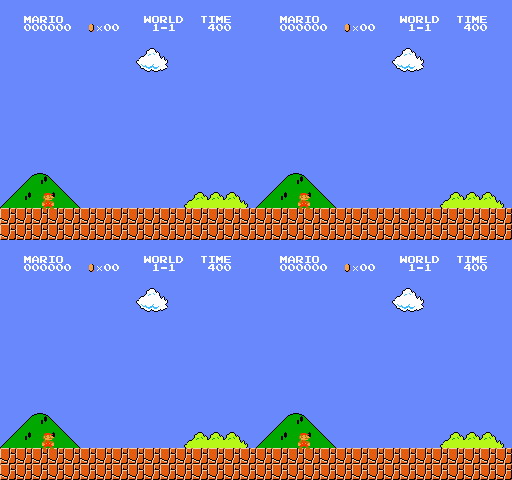

In [23]:
log_dir ='/content/drive/MyDrive/M/smb'

def Joy(env_id = 'SuperMarioBros-v0'):
  env = gym_super_mario_bros.make(env_id)
  env = JoypadSpace(env, SIMPLE_MOVEMENT)
  return env

#env = make_atari_env(env, n_envs=8, seed=0,vec_env_cls=SubprocVecEnv, wrapper_kwargs=wrapper_kwargs, monitor_dir= log_dir)
env = make_atari_env(Joy, n_envs=4, seed=0,vec_env_cls=DummyVecEnv, monitor_dir= "test")
env = VecFrameStack(env, n_stack=4)

from PIL import Image 
Image.fromarray((env.render(mode='rgb_array')))


In [20]:
log_dir ='/content/drive/MyDrive/M/smb'

from stable_baselines3.common.callbacks import BaseCallback
class TensorboardCallback(BaseCallback):
    def __init__(self, check_freq: int, log_dir: str, verbose=1):
        super(TensorboardCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, 'best_model')
        self.best_mean_reward = 0 # 直近100lifeの平均スコアのベスト

    def _init_callback(self) -> None:
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:
          # スコアの検索
          x, y = ts2xy(load_results(self.log_dir), 'timesteps')
          self.logger.record('timesteps', self.num_timesteps)
          self.logger.record('mean_reward', self.best_mean_reward)
          wandb.log({'mean_reward':self.best_mean_reward})
          wandb.log({'timesteps':self.num_timesteps})
          if len(x) > 0:
              # 直近100lifeのスコアの平均
              mean_reward = np.mean(y[-100:])
              if self.verbose > 0:
                print(f"Num timesteps: {self.num_timesteps} : ",end='')
                print(f"Best mean reward: {self.best_mean_reward:.2f} - Last mean reward/ep: {mean_reward:.2f}")

              # 直近の平均報酬が上昇した場合はモデルを保存
              if mean_reward > self.best_mean_reward:
                  self.best_mean_reward = mean_reward
                  if self.verbose > 0:
                    print(f"Saving new best model to {self.save_path}.zip")
                  self.model.save(self.save_path)
        return True

In [ ]:
#env = make_atari_env(Joy, n_envs=8, seed=0,vec_env_cls=SubprocVecEnv, monitor_dir=log_dir)
env = make_atari_env(Joy, n_envs=8, seed=0,vec_env_cls=DummyVecEnv, monitor_dir= log_dir)
env = VecFrameStack(env, n_stack=4)
# 最適パラメータ https://github.com/DLR-RM/rl-baselines3-zoo/blob/master/hyperparams/ppo.yml
model = PPO('CnnPolicy', env, verbose=0,device=device,        
    learning_rate = 2.5e-4,  # default  3e-4
    n_steps = 128, # 2048
    clip_range = 0.1, # default 0.2
    ent_coef = 0.01, # default 0.0
    batch_size = 256, #64
    n_epochs = 4 )
callback = TensorboardCallback(check_freq=500, log_dir=log_dir)
total_timesteps = 1e7
%time model.learn(total_timesteps=total_timesteps,callback=callback)

In [30]:
# Inside my model training code 
!export WANDB_NOTEBOOK_NAME="Mario".ipynb"
import wandb
PROJECTNAME='Mario'
wandb.init(project=PROJECTNAME)

/bin/bash: -c: line 0: unexpected EOF while looking for matching `"'
/bin/bash: -c: line 1: syntax error: unexpected end of file


wandb: Currently logged in as: aquapathos (use `wandb login --relogin` to force relogin)


In [31]:
import imageio
import numpy as np

#env8 = make_atari_env('SpaceInvadersNoFrameskip-v4', n_envs=8, seed=0,vec_env_cls=SubprocVecEnv, monitor_dir= log_dir)
env = make_atari_env(Joy, n_envs=8, seed=0,vec_env_cls=DummyVecEnv, monitor_dir= log_dir)
env = VecFrameStack(env, n_stack=4)
model = PPO('CnnPolicy',env)
model.load("/content/drive/MyDrive/M/smb/best_model.zip")

images = []
obs = model.env.reset()
img = model.env.envs[0].render(mode='rgb_array')
for i in range(1800):
    images.append(img)
    action, _ = model.predict(obs)
    obs, _, _ ,_ = model.env.step(action)
    img = model.env.envs[0].render(mode='rgb_array')

#imageio.mimsave('/SpaceInvadersBes.gif', [np.array(img) for i, img in enumerate(images) if i%2 == 0], fps=29)

In [32]:
width,height = 256,240
frame_rate = 30.0  #FPS
def timelaps(images,width,height):
    fourcc = cv2.VideoWriter_fourcc('m','p','4','v')
    video = cv2.VideoWriter('inveders.mp4', fourcc, frame_rate, (width, height))
    for img in images:
        video.write(img[:,:,::-1]) 
    video.release()
    print("動画変換完了")